In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


Exercise 1
Bank Marketing Data Set

Use the bank direct marketing dataset (bank.csv) to train a logistic regression (sklearn) predicting if a client will subscribe (1/0) to a term deposit (variable called ‘y’).

Use a train and test setup and use k-fold cross-validation to choose between L1- and L2-penalty or no penalty (read the documentation of sklearn.linear_model.LogisticRegression, you will have to specify ‘penalty’ and ‘C’). Hint: Use class_weight = ‘balanced’, as the dataset is unbalanced also use Pipeline.

Once you have chosen the best model (best test score), plot the ROC curve as well as precision and recall with varying thresholds (use the precision_recall_curve function from sklearn).

In [154]:
data = pd.read_csv('banking.csv')


In [155]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [156]:
X = data.iloc[:, :-2]
y = data.iloc[:, -1]

In [158]:
X['pdays_no_contact'] = (X['pdays'] == 999)*1
X = pd.get_dummies(X, columns = ['job', 'contact', 'marital','education', 'default','housing','loan', 'month','day_of_week','poutcome'],drop_first =True)
X = X.drop(['pdays'], axis =1)

In [258]:
X.head()
#data.nununique()
#drop the day month data
#cols =["default", "housing","loan"]
#for cat in cols:
    #data[cat] = pd.get_dummies(data[cat], drop_first =True)
#data["y"] chrck for balancing
#zscore - check for outliers

data['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [163]:
from sklearn.preprocessing import MinMaxScaler
sc_X =  MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [164]:
X_train

array([[0.19753086, 0.03436356, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.39506173, 0.02704351, 0.02380952, ..., 0.        , 1.        ,
        0.        ],
       [0.39506173, 0.00589671, 0.02380952, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.13580247, 0.08987393, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.22222222, 0.02318015, 0.02380952, ..., 0.        , 1.        ,
        0.        ],
       [0.38271605, 0.04127694, 0.14285714, ..., 1.        , 1.        ,
        0.        ]])

In [165]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver='liblinear',penalty='l2',C=1.0)
lg.fit(X_train, y_train)
train_accur = lg.score(X_train, y_train)
test_accur = lg.score(X_test, y_test)
train_accur, test_accur

(0.9108649468892261, 0.9090798737557659)

In [112]:
#predictions = lg.predict(X_test)

In [166]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [252]:
# We use in this case solver = 'lbfgs' because it works for no penalty Logistic Regression
lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs',penalty = 'none', max_iter=500)

#  implement pipeline
nopenality = lr.fit(X_train,y_train)

In [253]:
lr_nopenalty_score = np.mean(
    cross_val_score(nopenality,
                    X_train,
                    y_train.values.ravel(),
                    cv=4,
                    scoring='balanced_accuracy'))
lr_nopenalty_score

0.8716322434941508

In [239]:
C_param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

score_df = pd.DataFrame()
score_df['alpha'] = C_param_range

In [240]:
scores_l1 = []
for i in C_param_range:
    lg = LogisticRegression(solver='liblinear',penalty='l1',C=i, class_weight='balanced')
    score = np.mean(cross_val_score(lg, X_train, y_train, cv=4, scoring="roc_auc" ))
    scores_l1.append(score)
score_df['L1'] = scores_l1

In [241]:
scores_l2 = []
for i in C_param_range:
    lg = LogisticRegression(solver='liblinear',penalty='l2',C=i, class_weight='balanced')
    score = np.mean(cross_val_score(lg, X_train, y_train, cv=4, scoring="roc_auc" ))
    scores_l2.append(score)
score_df['L2'] = scores_l2

In [242]:
score_df

,alpha,L1,L2
0,0.0001,0.500000,0.782533
1,0.0010,0.747111,0.798578
2,0.0100,0.925799,0.862397
3,0.1000,0.936448,0.924945
4,1.0000,0.937107,0.936140
5,10.0000,0.937086,0.937028
6,100.0000,0.937079,0.937074
7,1000.0000,0.937078,0.937077


No handles with labels found to put in legend.


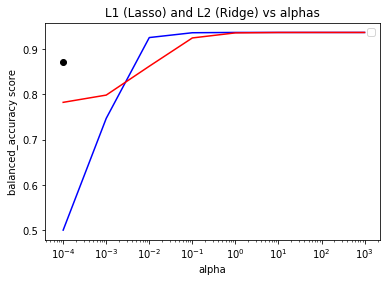

In [244]:
# Lasso
plt.semilogx(score_df['alpha'],score_df['L1'], color = 'blue')

# Ridge
plt.semilogx(score_df['alpha'],score_df['L2'], color = 'red')

plt.scatter(x=C_param_range[0], y =lr_nopenalty_score, color = 'black')

plt.title('L1 (Lasso) and L2 (Ridge) vs alphas')
plt.xlabel('alpha')
plt.legend()
plt.ylabel('balanced_accuracy score');

In [245]:
score_df.L1.max(), score_df.L2.max(), lr_nopenalty_score

(0.9371068168702541, 0.9370769489897357, 0.8716322434941508)

In [ ]:
acc_table_l1 = pd.DataFrame(columns = ['C_parameter','Accuracy'])
acc_table_l1['C_parameter'] = C_param_range

In [198]:
C_param_range = [0.1,0.001,1,10,100]
j=0
for i in C_param_range:
    kfold = KFold(n_splits=10, shuffle= True)
    model_kfold = LogisticRegression(solver='liblinear',penalty='l1',C=i, class_weight='balanced')
    results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold, scoring="roc_auc" )
    acc_table_l1.iloc[j,1] = np.mean((results_kfold)) 
    j += 1

In [205]:
C_param = [0.1,0.001,1,10,100]

In [208]:
acc_table_l2 = pd.DataFrame(columns = ['C_parameter','Accuracy'])
acc_table_l2['C_parameter'] = C_param

In [210]:

j=0
for i in C_param_range:
    kfold = KFold(n_splits=10, shuffle= True)
    model_kfold = LogisticRegression(solver='liblinear',penalty='l2',C=i, class_weight='balanced')
    results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold, scoring="roc_auc" )
    acc_table_l2.iloc[j,1] = np.mean((results_kfold)) 
    j += 1

In [211]:
l1 = acc_table_l1['Accuracy']
l1

0    0.926936
1    0.800893
2    0.936052
3    0.936937
4    0.936644
Name: Accuracy, dtype: object

In [212]:
l2 = acc_table_l2['Accuracy']
l2

0    0.926586
1    0.800551
2    0.936173
3    0.936911
4    0.936999
Name: Accuracy, dtype: object

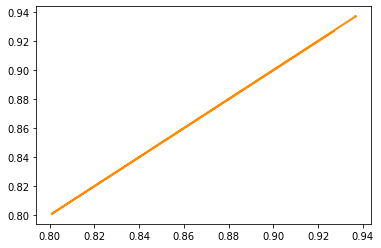

In [215]:
plt.plot(l1, l2, color='darkorange',
         lw=2, label='l1/l2 (area = %0.2f)' % roc_auc)


In [216]:
best_model = LogisticRegression(solver='liblinear',penalty='l2',C=0.1, class_weight='balanced')

In [217]:
best_model.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [246]:
prediction_train = best_model.predict_proba(X_train)[:,1]
prediction_test = best_model.predict_proba(X_test)[:,1]

In [248]:
fpr_train, tpr_train, _ = metrics.roc_curve(y_train, prediction_train)
fpr_test, tpr_test, _ = metrics.roc_curve(y_test, prediction_test)

In [249]:
prediction_train_untuned = nopenality.predict_proba(X_train)[:,1]
prediction_test_untuned = nopenality.predict_proba(X_test)[:,1]

In [250]:
fpr_train_untuned, tpr_train_untuned, _ = metrics.roc_curve(y_train, prediction_train_untuned)
fpr_test_untuned, tpr_test_untuned, _ = metrics.roc_curve(y_test, prediction_test_untuned)

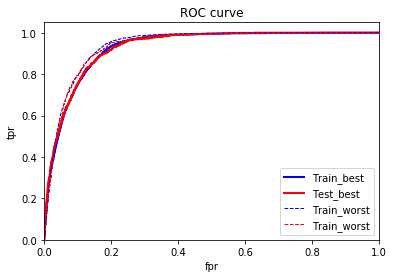

In [251]:
plt.plot(fpr_train, tpr_train, 'b', linewidth=2, markersize=4, label = 'Train_best')
plt.plot(fpr_test, tpr_test, 'r', linewidth=2, markersize=4,label = 'Test_best')
plt.plot(fpr_train_untuned, tpr_train_untuned, 'b--', linewidth=1, markersize=4,label = 'Train_worst')
plt.plot(fpr_test_untuned, tpr_test_untuned, 'r--', linewidth=1, markersize=4,label = 'Train_worst')
plt.xlabel('fpr')
plt.legend()
plt.ylabel('tpr')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('ROC curve');

In [219]:
prediction.shape

(8238, 2)

In [220]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [221]:
prediction[:1]

array([[0.79192095, 0.20807905]])

In [222]:
score = roc_auc_score(y_test, prediction[:,1])
score

0.929316167911018

In [223]:
fpr, tpr, threshold = metrics.roc_curve(y_test, prediction[:,1])
roc_auc = metrics.auc(fpr, tpr)

In [224]:
roc_auc

0.929316167911018

In [227]:
pred = best_model.predict(X_test)

In [232]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = confusion_matrix(y_test, pred)
print(matrix)

[[6233 1049]
 [ 140  816]]


In [231]:
report = classification_report(y_test, pred)
report

'              precision    recall  f1-score   support\n\n           0       0.98      0.86      0.91      7282\n           1       0.44      0.85      0.58       956\n\n    accuracy                           0.86      8238\n   macro avg       0.71      0.85      0.75      8238\nweighted avg       0.92      0.86      0.87      8238\n'

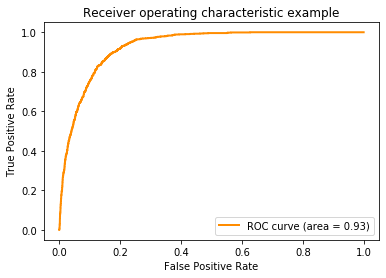

In [148]:
plt.figure()

plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#for i in C_param_range:
  #  kfold = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=i)
  #  all_accuracies = cross_val_score(kfold, X_train, y_train, scoring='roc_auc' , cv=5)
  #  acc_table_l1.loc[acc_table_l1['C_parameter'] == i, "ROC_AUC"] = np.mean(all_accuracies)

Exercise 2 (BONUS)
We will be using the Digits dataset from sklearn. This dataset is made up of 1797 8x8 images. Each image, like the one shown below, is of a handwritten digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64:

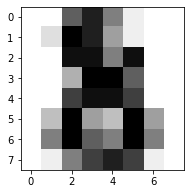

In [233]:

from sklearn import datasets

import matplotlib.pyplot as plt

#Load the digits dataset
digits = datasets.load_digits()

#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [ ]:
acc_table_l1

In [27]:
np.mean((results_kfold))

0.9965402124430958

In [23]:
results_kfold

array([0.99817906, 0.99423369, 0.99726859, 0.9969651 , 0.9969651 ,
       0.99817906, 0.99453718, 0.99484067, 0.99757208, 0.99666161])

In [17]:
kfold = KFold(n_splits=10, shuffle= True)
model_kfold = LogisticRegression(solver='liblinear',penalty='l1',C=1.0, class_weight='balanced')
results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold)
score.append(results_kfold)

In [ ]:
np.mean(score)

In [14]:
from sklearn.pipeline import Pipeline